In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heart_disease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
# Declear the features in our target
X = heart_disease_df.iloc[:, :13]
y = heart_disease_df.iloc[:, 13]

# Here we replace some random string values.
X = X.replace(to_replace='?', value=0)

# Now we Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# here we standardize the data
X_std = StandardScaler().fit_transform(X)

In [4]:

dbscan_cluster = DBSCAN(eps=1, min_samples=7, metric="euclidean")

 
clusters = dbscan_cluster.fit_predict(X_std)

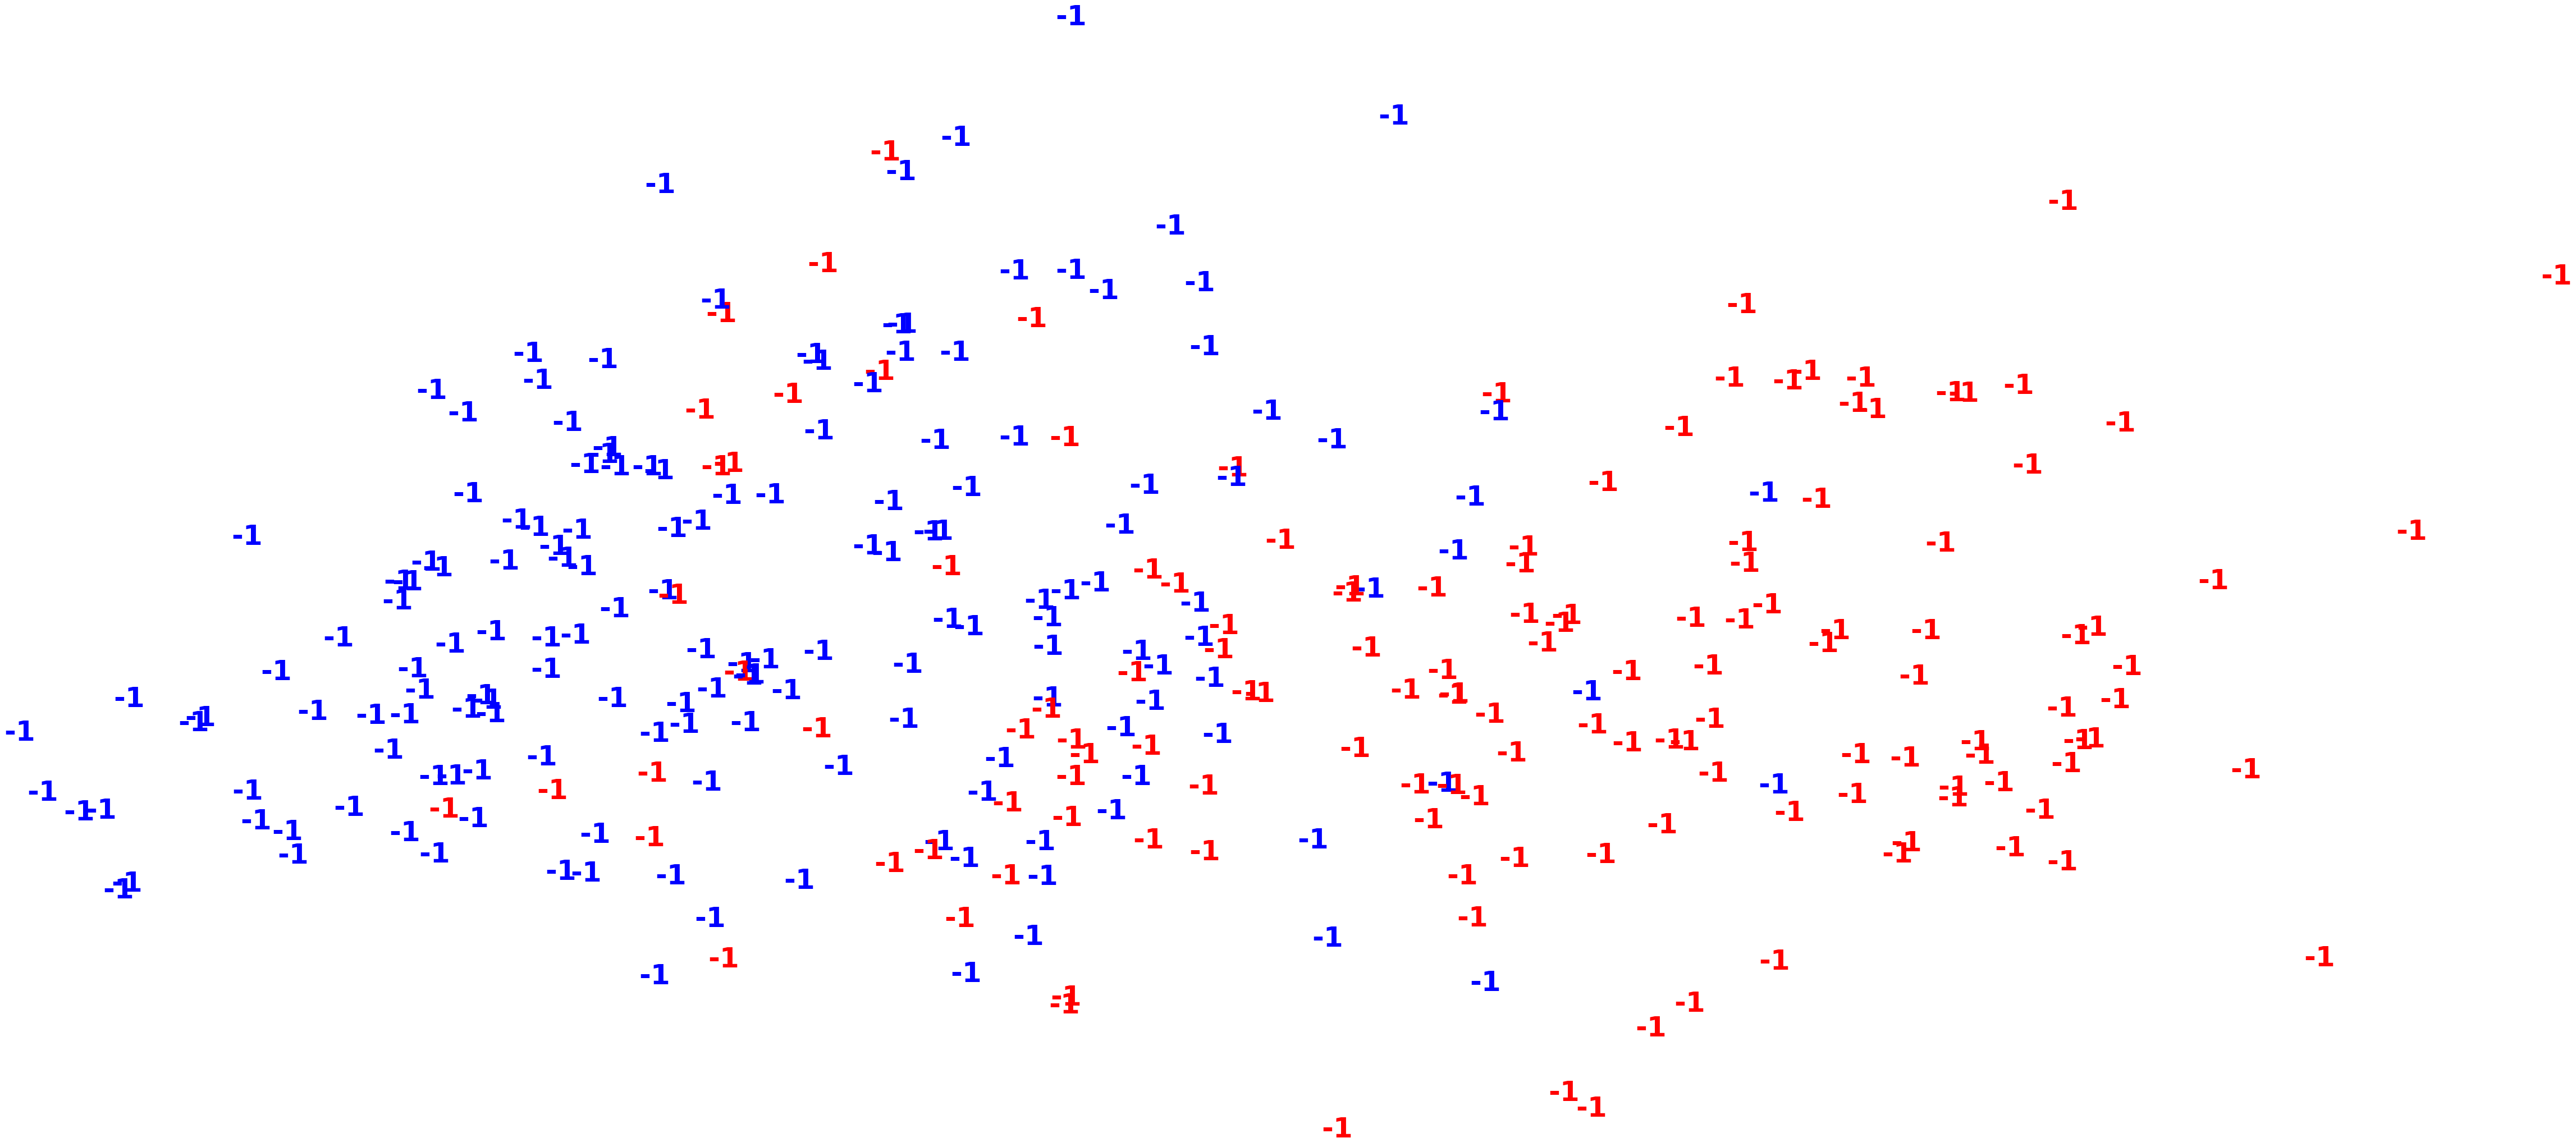

In [5]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [6]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=4, min_samples=1, metric="euclidean")

 # Fit model
clusters = dbscan_cluster.fit_predict(X_std)

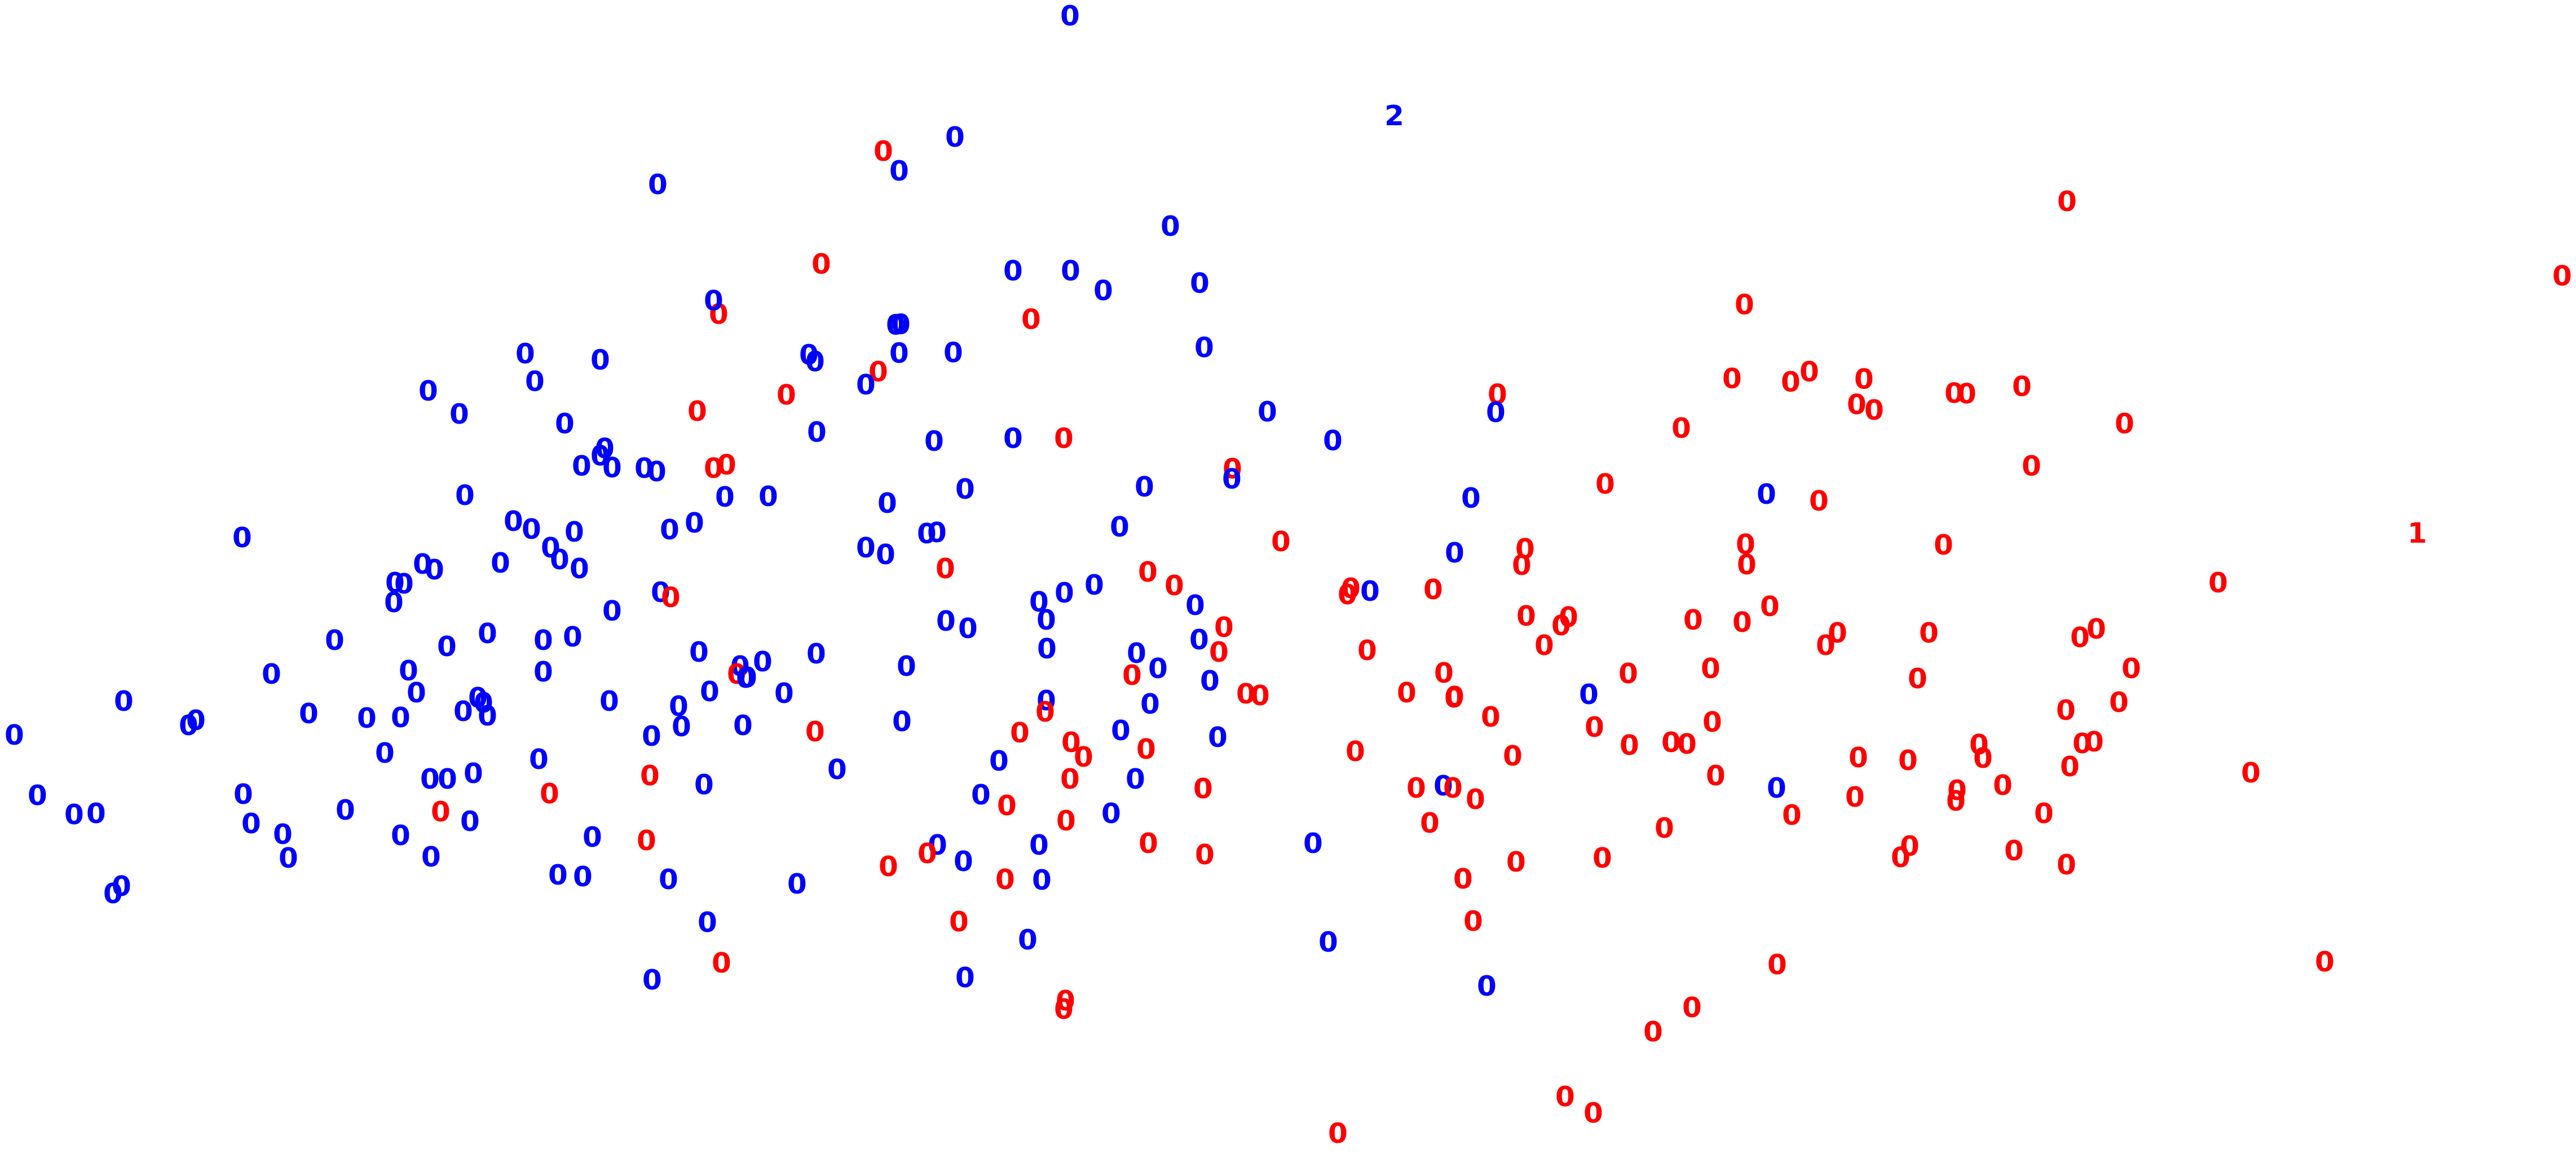

In [7]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()